'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


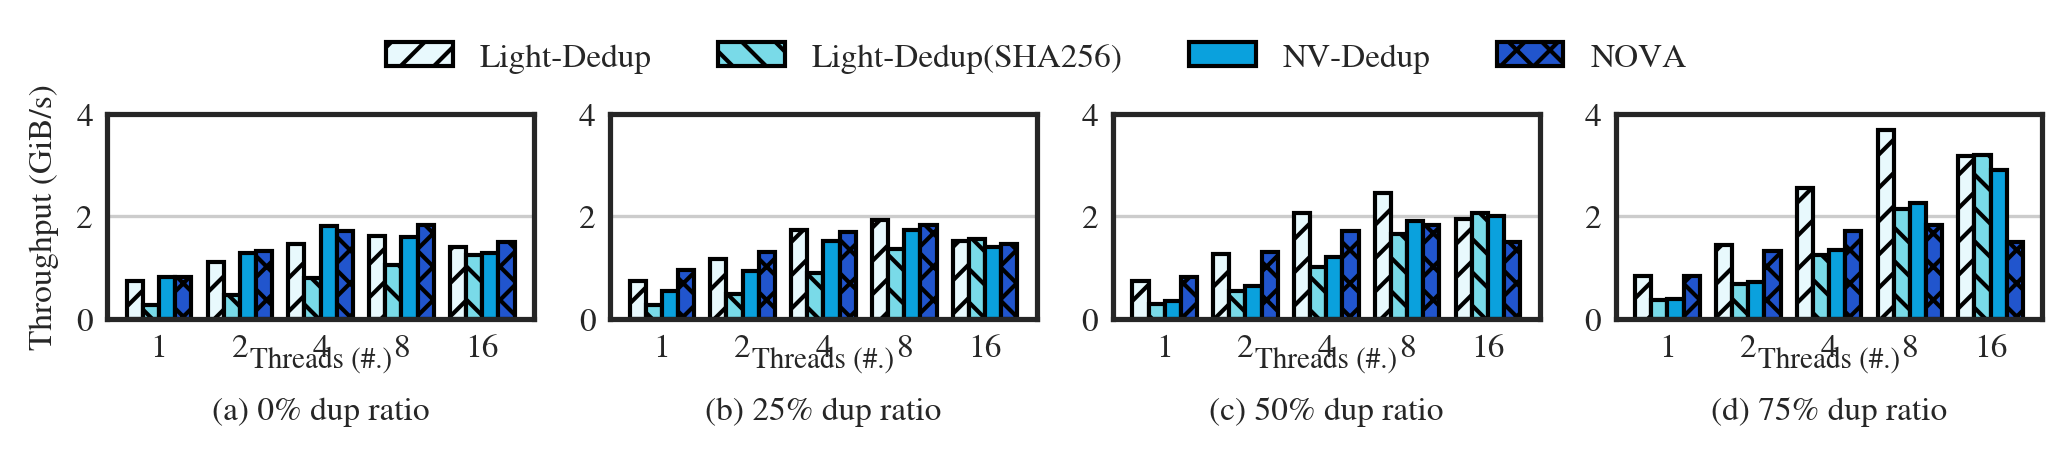

In [4]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

rows = df.shape[0]
cols = df.shape[1]

df_dup0 =  df[df['dup_rate'] == 0].drop(columns=['dup_rate'])
df_dup25 = df[df['dup_rate'] == 25].drop(columns=['dup_rate'])
df_dup50 = df[df['dup_rate'] == 50].drop(columns=['dup_rate'])
df_dup75 = df[df['dup_rate'] == 75].drop(columns=['dup_rate'])


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(DOUBLE_COL_WIDTH), cm_to_inch(4)))
bar_width = 0.2
subfig_titles = ["(a) 0% dup ratio", "(b) 25% dup ratio", "(c) 50% dup ratio", "(d) 75% dup ratio"]
patterns = ['///', '\\\\\\', '', 'XXX']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#E8F9FD", "#79DAE8", "#0AA1DD", "#2155CD"]

dfs = [df_dup0, df_dup25, df_dup50, df_dup75]
for i in range(4):
    subfig = plt.subplot(1, 4, i + 1)
    df = dfs[i]
    x = [1, 2, 3, 4, 5]
    x_label = df['num_job'].drop_duplicates().reset_index().drop(columns=['index'])['num_job']
    fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    tot = len(fss) * bar_width
    for idx, fs in enumerate(fss):
        points = []
        for pivot in x:
            point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
            points.append(point)
        plt.bar(points, df[df['file_system'] == fs]['bandwidth(MiB/s)'] / 1024, width=bar_width, hatch=patterns[idx], edgecolor='black', color=colors[idx])
        plt.yticks([0, 2, 4], fontsize=8)
        plt.xticks(x, labels=x_label, fontsize=8)

    # Draw title
    subfig.text(0.5, -0.2, "Threads (#.)", ha='center', va='center', fontsize=7, transform=subfig.transAxes)
    if (i == 0):
        plt.ylabel('Throughput (GiB/s)', fontsize=8)
    plt.xlabel(subfig_titles[i], labelpad = 8, fontsize=8) 
            
fig.legend(fss, loc='center', bbox_to_anchor=(0.5, 1), ncol=4, fontsize=8)

plt.tight_layout()
plt.savefig("./FIG-FIO.pdf", bbox_inches='tight', pad_inches=0)
